---
### Import Libraries

In [1]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("parkinsons_UK_data.csv")

### Exploratory Data Analysis

In [2]:
df.head()

,status,DFA,RPDE,MDVP:RAP,MDVP:Shimmer,NHR,HNR
0,1,0.815285,0.414783,0.00370,0.04374,0.02211,21.033
1,1,0.819521,0.458359,0.00465,0.06134,0.01929,19.085
2,1,0.825288,0.429895,0.00544,0.05233,0.01309,20.651
3,1,0.819235,0.434969,0.00502,0.05492,0.01353,20.644
4,1,0.823484,0.417356,0.00655,0.06425,0.01767,19.649


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        195 non-null    int64  
 1   DFA           195 non-null    float64
 2   RPDE          195 non-null    float64
 3   MDVP:RAP      195 non-null    float64
 4   MDVP:Shimmer  195 non-null    float64
 5   NHR           195 non-null    float64
 6   HNR           195 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.8 KB


In [4]:
df.describe()

,status,DFA,RPDE,MDVP:RAP,MDVP:Shimmer,NHR,HNR
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.753846,0.718099,0.498536,0.003306,0.029709,0.024847,21.885974
std,0.431878,0.055336,0.103942,0.002968,0.018857,0.040418,4.425764
min,0.000000,0.574282,0.256570,0.000680,0.009540,0.000650,8.441000
25%,1.000000,0.674758,0.421306,0.001660,0.016505,0.005925,19.198000
50%,1.000000,0.722254,0.495954,0.002500,0.022970,0.011660,22.085000
75%,1.000000,0.761881,0.587562,0.003835,0.037885,0.025640,25.075500
max,1.000000,0.825288,0.685151,0.021440,0.119080,0.314820,33.047000


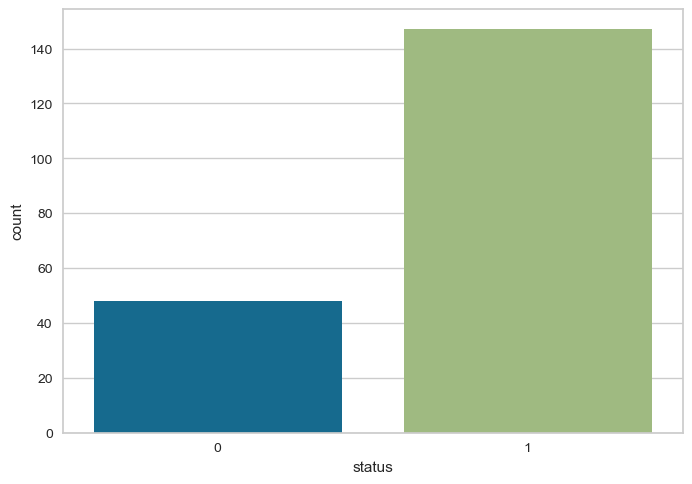

In [5]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

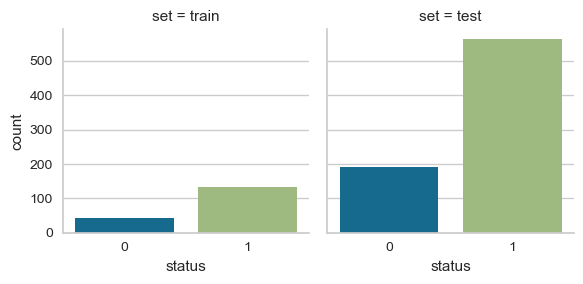

Training dataset           : 176
Unseen data for validation : 756


In [6]:
test_df = pd.read_csv("parkinsons_Istanbul_data.csv")
train_df = df.sample(frac=0.9).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [7]:
clf1 = setup(data = train_df, target = 'status', fix_imbalance=True, session_id=123, remove_outliers = True)




,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(176, 8)"
4,Transformed data shape,"(225, 8)"
5,Transformed train set shape,"(172, 8)"
6,Transformed test set shape,"(53, 8)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


### Model selection

In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8372,0.8859,0.8589,0.9293,0.8843,0.5900,0.6209,0.4450
et,Extra Trees Classifier,0.8372,0.8859,0.8811,0.9071,0.8890,0.5690,0.5910,0.4690
gbc,Gradient Boosting Classifier,0.8051,0.8756,0.8611,0.8832,0.8632,0.4875,0.5234,0.3500
lightgbm,Light Gradient Boosting Machine,0.7885,0.8781,0.8378,0.8728,0.8451,0.4764,0.4868,0.2790
lda,Linear Discriminant Analysis,0.7724,0.8278,0.7411,0.9510,0.8254,0.5049,0.5446,0.2300
dt,Decision Tree Classifier,0.7551,0.6578,0.8489,0.8279,0.8335,0.3294,0.3294,0.2200
ada,Ada Boost Classifier,0.7314,0.7374,0.7733,0.8577,0.8107,0.3438,0.3532,0.3340
ridge,Ridge Classifier,0.7224,0.0000,0.6867,0.9397,0.7779,0.4192,0.4729,0.1910
lr,Logistic Regression,0.7154,0.7978,0.6978,0.9178,0.7811,0.3761,0.4209,0.3470
nb,Naive Bayes,0.7064,0.8274,0.6322,0.9764,0.7511,0.4318,0.5061,0.1990


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

### Create Extra Trees Classifier Model

In [8]:
extraTreesClassifier = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5385,0.8167,0.4000,1.0000,0.5714,0.2353,0.3651
1,0.7692,0.7500,0.8000,0.8889,0.8421,0.4179,0.4260
2,0.9231,0.9861,0.8889,1.0000,0.9412,0.8312,0.8433
3,0.8333,0.8889,0.7778,1.0000,0.8750,0.6364,0.6831
4,0.6667,0.8148,0.7778,0.7778,0.7778,0.1111,0.1111
5,0.8333,0.8889,1.0000,0.8182,0.9000,0.4286,0.5222
6,0.9167,0.9630,1.0000,0.9000,0.9474,0.7500,0.7746
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8333,0.9259,0.8889,0.8889,0.8889,0.5556,0.5556


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuned Model

In [9]:
tuned_extraTreesClassifier = tune_model(extraTreesClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5385,0.8667,0.4000,1.0000,0.5714,0.2353,0.3651
1,0.7692,0.8000,0.8000,0.8889,0.8421,0.4179,0.4260
2,0.9231,0.9722,0.8889,1.0000,0.9412,0.8312,0.8433
3,0.7500,0.7778,0.6667,1.0000,0.8000,0.5000,0.5774
4,0.6667,0.7778,0.6667,0.8571,0.7500,0.2727,0.2928
5,0.8333,0.8519,1.0000,0.8182,0.9000,0.4286,0.5222
6,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7500,0.9259,0.7778,0.8750,0.8235,0.4000,0.4082


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate training performance

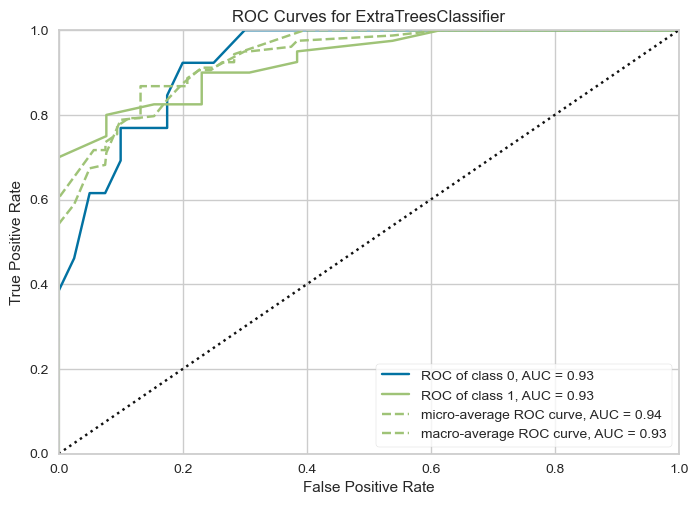

In [10]:
plot_model(tuned_extraTreesClassifier, plot = 'auc')

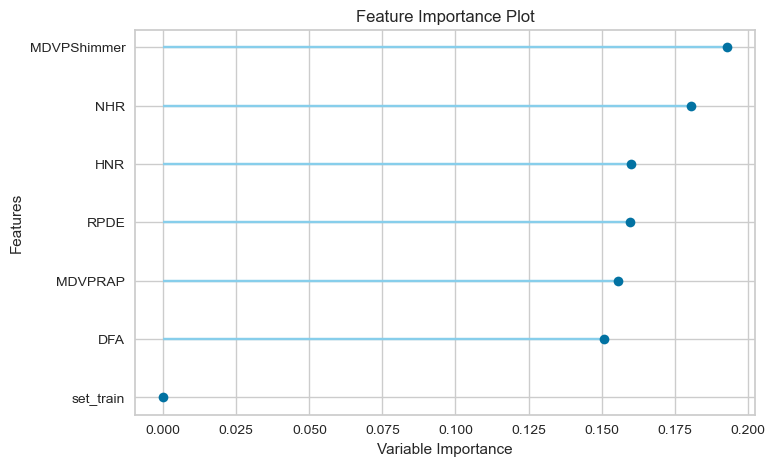

In [11]:
plot_model(tuned_extraTreesClassifier, plot='feature')

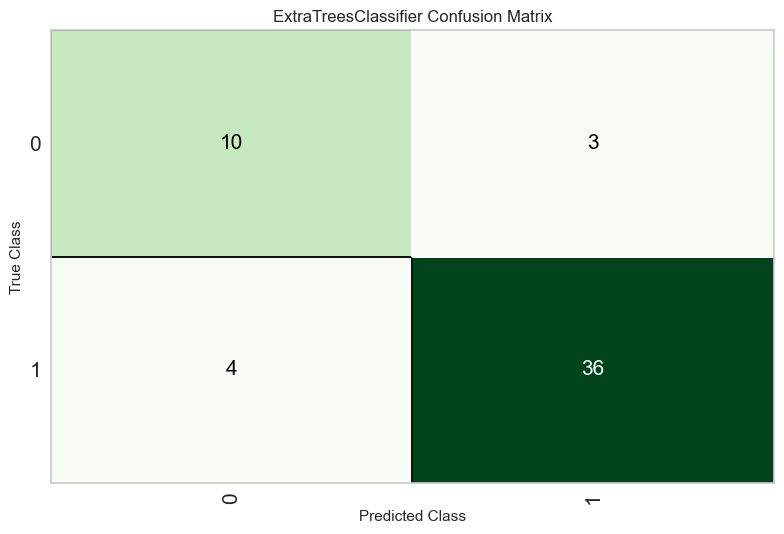

In [12]:
plot_model(tuned_extraTreesClassifier, plot = 'confusion_matrix')

### Evaluate on unseen data

In [13]:
final_extraTreesClassifier = finalize_model(tuned_extraTreesClassifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7579,0.7018,0.9291,0.7856,0.8513,0.2239,0.2489


              precision    recall  f1-score   support

   parkinson       0.55      0.26      0.35       192
      normal       0.79      0.93      0.85       564

    accuracy                           0.76       756
   macro avg       0.67      0.59      0.60       756
weighted avg       0.73      0.76      0.72       756



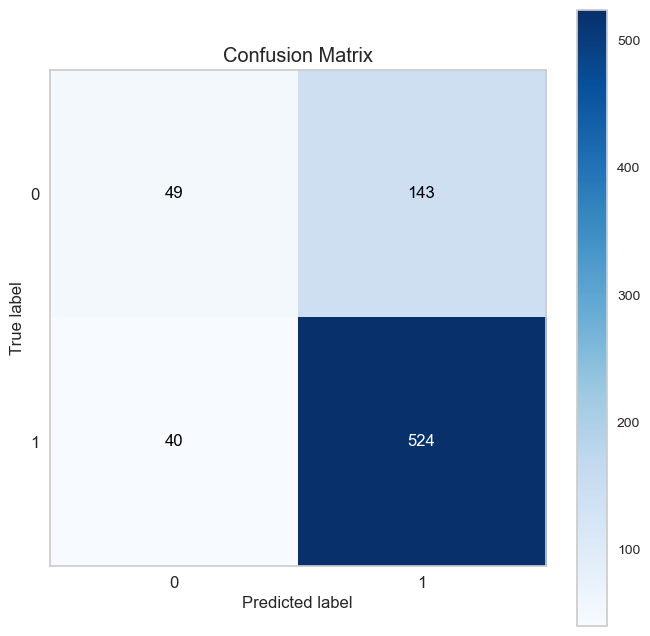

In [14]:
unseen_predictions = predict_model(final_extraTreesClassifier, data=test_df)
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)


